## Comparisons, Masks, and Boolean Logic
Eber David Gaytan Medina

This section covers the use of Boolean masks to examine and manipulate values within NumPy arrays. Masking comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion: for example, you might wish to count all values greater than a certain value, or perhaps remove all outliers that are above some threshold. In NumPy, Boolean masking is often the most efficient way to accomplish these types of tasks.



In [ ]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles
plt.hist(inches, 40);


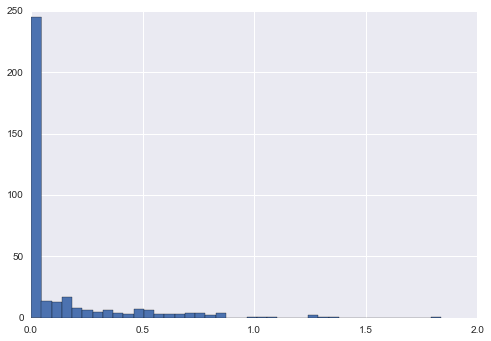

In [ ]:
x = np.array([1, 2, 3, 4, 5])
x < 3  # less than
array([ True,  True, False, False, False], dtype=bool)
x > 3  # greater than
array([False, False, False,  True,  True], dtype=bool)
x <= 3  # less than or equal
array([ True,  True,  True, False, False], dtype=bool)
x >= 3  # greater than or equal
array([False, False,  True,  True,  True], dtype=bool)
x != 3  # not equal
array([ True,  True, False,  True,  True], dtype=bool)
x == 3  # equal
array([False, False,  True, False, False], dtype=bool)
# is also possible to do an element-wise comparison of two arrays, and to include compound expressions:

(2 * x) == (x ** 2)
array([False,  True, False, False, False], dtype=bool)

In [ ]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x
array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])
x < 6
array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]], dtype=bool)

In [ ]:
print(x)
[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]

In [ ]:
# how many values less than 6?
np.count_nonzero(x < 6)

In [ ]:
np.sum(x < 6)
8

In [ ]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)
array([4, 2, 2])

In [ ]:
# are there any values greater than 8?
np.any(x > 8)
True
# are there any values less than zero?
np.any(x < 0)
False
# are all values less than 10?
np.all(x < 10)
True
# are all values equal to 6?
np.all(x == 6)
False

In [ ]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)
array([ True, False,  True], dtype=bool)

In [ ]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) &
                                                (inches < 0.2)))
Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75

In [ ]:
x
array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])
#We can obtain a Boolean array for this condition easily, as we've already seen:

x < 5
array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]], dtype=bool)
#Now to select these values from the array, we can simply index on this Boolean array; this is known as a masking operation:

x[x < 5]
array([0, 3, 3, 3, 2, 4])

In [ ]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))
Median precip on rainy days in 2014 (inches):    0.194881889764
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.850393700787
Median precip on non-summer rainy days (inches): 0.200787401575

In [ ]:
bool(42), bool(0)
(True, False)
bool(42 and 0)
False
bool(42 or 0)
True

In [ ]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B
array([ True,  True,  True, False,  True,  True], dtype=bool)

In [ ]:
x = np.arange(10)
(x > 4) & (x < 8)